In [1]:
import pandas as pd
import asyncio, time, nest_asyncio, os, requests
nest_asyncio.apply()

## Get product list

In [2]:
df = pd.read_csv('lisproduct.csv',dtype=str)
skuList = list(df['prcode'])

## Test getting image

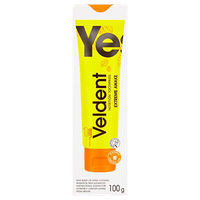

In [7]:
from PIL import Image
from io import BytesIO
Image.open(BytesIO(requests.get(f'https://d1vl5j0v241n75.cloudfront.net/{sku}').content),formats=['PNG'])

## create async requests function

In [3]:
missingList = []
async def getImage(sku:str):
  response = requests.get(f'https://d1vl5j0v241n75.cloudfront.net/{sku}')
  if response.status_code != 200: missingList.append(sku)
  return
async def runAll(skus):
  coros = [getImage(sku) for sku in skus]
  await asyncio.gather(*coros)

## run the function 

In [4]:
loop = asyncio.get_event_loop()
loop.run_until_complete(runAll(skuList))

## get the missing item list

In [5]:
len(missingList)

385